# Fare prediction for Yellow Taxi.

Design an algorithm that will tell the fare to be charged for a passanger.


# Import libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data

The train set has 12M values, so for this project we are going to chunk the data set and use a part of the data to train.

In [125]:
# # Function to split the data into multiple part
# def split_data():
#     #chunk size
#     chunk_size = 200000
#     nb = 0
    
#     # Get the fist 200K values from train.csv
#     for chunk in pd.read_csv('yellow_tripdata_2016-03.csv', chunksize=chunk_size):
#         chunk.to_csv('partial_train'+ str(nb) +'.csv', index=False)
#         nb+=1

In [126]:
raw_data = pd.read_csv('train.csv')
raw_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,2016-03-01 11:33:03,2016-03-01 11:54:03,1,2.18,-73.983498,40.734501,1,N,-73.976463,40.759010,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76
199996,2,2016-03-01 11:33:04,2016-03-01 11:46:05,1,1.70,-73.991852,40.751495,1,N,-73.975075,40.763672,1,10.0,0.0,0.5,2.70,0.00,0.3,13.50
199997,2,2016-03-01 11:33:04,2016-03-01 12:00:17,1,2.19,-73.969940,40.752838,1,N,-73.995819,40.769348,1,16.5,0.0,0.5,3.46,0.00,0.3,20.76
199998,2,2016-03-01 11:33:04,2016-03-01 11:53:49,1,8.17,-73.955017,40.777412,1,N,-73.861343,40.839046,2,25.0,0.0,0.5,0.00,0.00,0.3,25.80


# Explore the data to gain insights

### Study each attibute and its characteritices

In [127]:
# Get the columns name
raw_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [128]:
# Get the columns type
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               200000 non-null  int64  
 1   tpep_pickup_datetime   200000 non-null  object 
 2   tpep_dropoff_datetime  200000 non-null  object 
 3   passenger_count        200000 non-null  int64  
 4   trip_distance          200000 non-null  float64
 5   pickup_longitude       200000 non-null  float64
 6   pickup_latitude        200000 non-null  float64
 7   RatecodeID             200000 non-null  int64  
 8   store_and_fwd_flag     200000 non-null  object 
 9   dropoff_longitude      200000 non-null  float64
 10  dropoff_latitude       200000 non-null  float64
 11  payment_type           200000 non-null  int64  
 12  fare_amount            200000 non-null  float64
 13  extra                  200000 non-null  float64
 14  mta_tax                200000 non-nu

In [129]:
# Ckeck for missing and duplicate values
raw_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [130]:
raw_data.duplicated().sum()

0

In [131]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.719445,1.775670,2.809680,-73.124061,40.285871,1.034765,-73.157604,40.302974,1.322720,12.692191,0.051002,0.497640,1.817213,0.331260,0.299636,15.688926
std,0.449272,1.477994,3.593194,7.882185,4.340578,0.506732,7.731900,4.258403,0.477172,10.922912,0.152004,0.037542,2.523040,2.061857,0.014083,13.655795
min,1.000000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,0.960000,-73.990929,40.740089,1.000000,-73.990562,40.740036,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.600000,-73.979523,40.755941,1.000000,-73.978683,40.755459,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,2.000000,2.000000,2.900000,-73.963188,40.770267,1.000000,-73.964523,40.767368,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000
max,2.000000,6.000000,184.400000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


- We will need to clean the pick up and drop up location that have zero value

- Also clean up the negative fare amount.

In [132]:
raw_data['RatecodeID'].value_counts()

1     195341
2       3712
5        438
3        420
4         84
99         4
6          1
Name: RatecodeID, dtype: int64

### Visualize the data

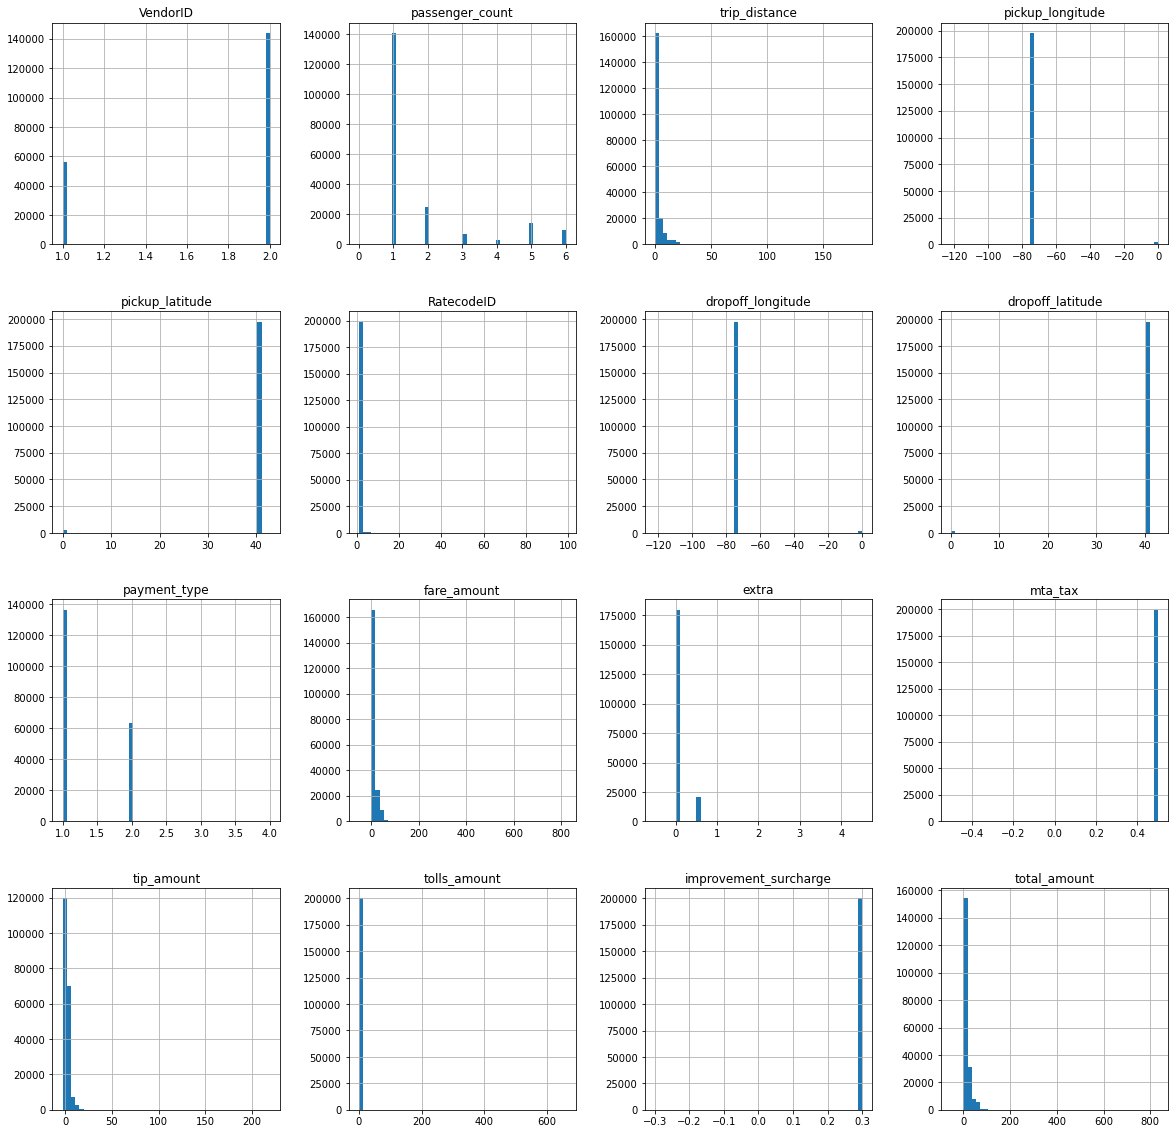

In [133]:
# Plote the numerical attributes
%matplotlib inline
raw_data.hist(bins=50, figsize=(20,20))
plt.show()

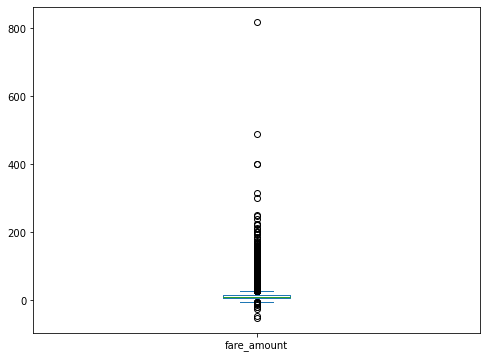

In [134]:
# Let's check for outlier
raw_data['fare_amount'].plot(kind="box", figsize=(8,6))
plt.show()


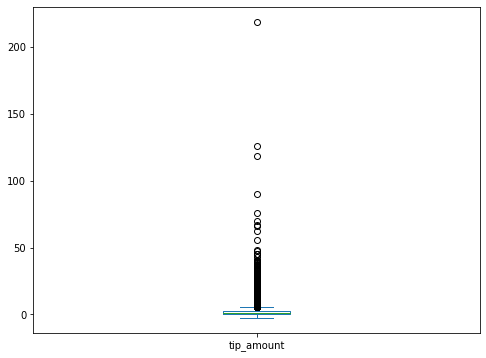

In [135]:
raw_data['tip_amount'].plot(kind="box", figsize=(8,6))
plt.show()


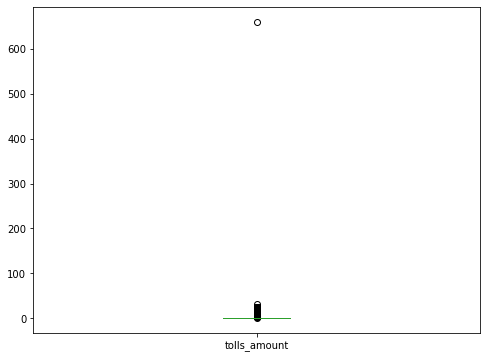

In [136]:
raw_data['tolls_amount'].plot(kind="box", figsize=(8,6))
plt.show()

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

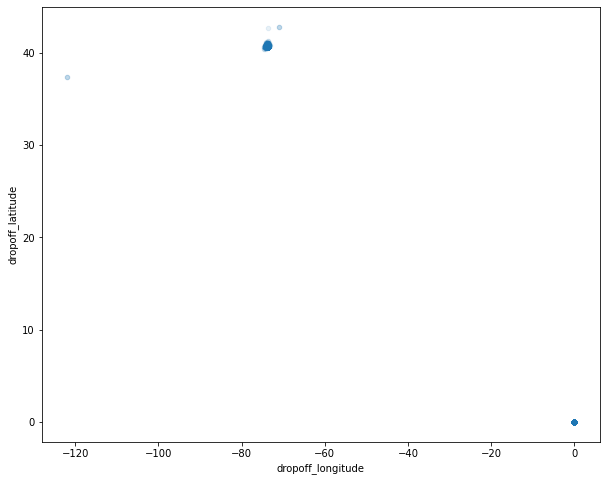

In [137]:
# Visualize the data geographicaly base on pick up location
raw_data.plot(kind='scatter', x='dropoff_longitude', y ='dropoff_latitude', figsize=(10,8), alpha=0.1)


### Study the correlation between attributes

In [138]:
# Get the corelation between attributes
corr_data = raw_data.corr()
corr_data

# Get the correlation between total_amount and other attributes
corr_data['total_amount'].sort_values(ascending=False)

total_amount             1.000000
fare_amount              0.977262
trip_distance            0.895303
tip_amount               0.717987
tolls_amount             0.570457
RatecodeID               0.259279
improvement_surcharge    0.036716
VendorID                 0.022353
dropoff_longitude        0.009555
pickup_longitude         0.008264
extra                    0.006137
passenger_count          0.005255
pickup_latitude         -0.007450
dropoff_latitude        -0.009524
payment_type            -0.156327
mta_tax                 -0.211263
Name: total_amount, dtype: float64

array([[<AxesSubplot:xlabel='total_amount', ylabel='total_amount'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='total_amount'>,
        <AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>,
        <AxesSubplot:xlabel='tip_amount', ylabel='total_amount'>,
        <AxesSubplot:xlabel='tolls_amount', ylabel='total_amount'>,
        <AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>],
       [<AxesSubplot:xlabel='total_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='tip_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='tolls_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='RatecodeID', ylabel='fare_amount'>],
       [<AxesSubplot:xlabel='total_amount', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='trip_distance', ylabel='trip_d

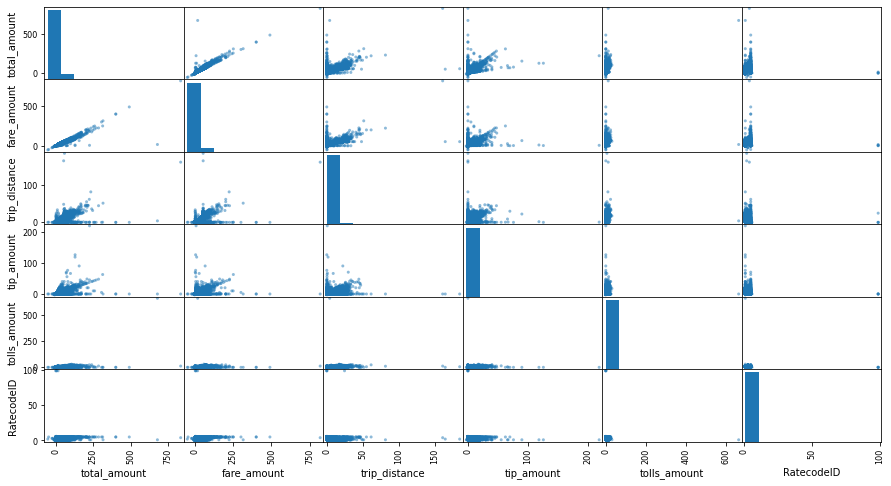

In [139]:
# Pandas scatter plot
from pandas.plotting import scatter_matrix

attributes=['total_amount','fare_amount','trip_distance','tip_amount','tolls_amount','RatecodeID']

scatter_matrix(raw_data[attributes], figsize=(15,8))

In [140]:
# # Use the Scikit-Learn train_test_split function
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)

In [141]:
# train_set = pd.DataFrame(train_set)

In [142]:
# train_set.shape
# test_set.shape

# Prepare the data to better expose the underlying data patterns to ML algorithms

### Data cleaning

In [143]:
train = raw_data.copy()

In [144]:
# Let's remove the negative values in total amount and also remove the attribute with location zero
def clean_locations(data):
    locations = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
    for l in locations:
        data = data[data[l] != 0]
    return data

clean_data = clean_locations(train)

In [145]:
# Create extra columns

# Convert pickup time and dropoff time to datetime
import calendar
def convert_datetime(data):
    
    col = ['tpep_pickup_datetime','tpep_dropoff_datetime']
    for c in col:
        data[c] = pd.to_datetime(data[c])
    data['trip_time'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/60
    data['trip_time'] = round(data['trip_time'],2)
    
    
    #data['day']=data['tpep_pickup_datetime'].apply(lambda x:x.day)
    data['hour']=data['tpep_pickup_datetime'].apply(lambda x:x.hour)
    #data['weekday']=data['tpep_pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
    #data['month']=data['tpep_pickup_datetime'].apply(lambda x:x.month)
    #data['year']=data['tpep_pickup_datetime'].apply(lambda x:x.year)
    #data.weekday = data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
    
    return data

clean_data = convert_datetime(clean_data)


In [146]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.92,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.10,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.10,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.00,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,2016-03-01 11:33:03,2016-03-01 11:54:03,1,2.18,-73.983498,40.734501,1,N,-73.976463,...,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76,21.00,11
199996,2,2016-03-01 11:33:04,2016-03-01 11:46:05,1,1.70,-73.991852,40.751495,1,N,-73.975075,...,1,10.0,0.0,0.5,2.70,0.00,0.3,13.50,13.02,11
199997,2,2016-03-01 11:33:04,2016-03-01 12:00:17,1,2.19,-73.969940,40.752838,1,N,-73.995819,...,1,16.5,0.0,0.5,3.46,0.00,0.3,20.76,27.22,11
199998,2,2016-03-01 11:33:04,2016-03-01 11:53:49,1,8.17,-73.955017,40.777412,1,N,-73.861343,...,2,25.0,0.0,0.5,0.00,0.00,0.3,25.80,20.75,11


In [147]:
clean_df = clean_data.copy()
clean_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.92,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.10,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.10,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.00,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,2016-03-01 11:33:03,2016-03-01 11:54:03,1,2.18,-73.983498,40.734501,1,N,-73.976463,...,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76,21.00,11
199996,2,2016-03-01 11:33:04,2016-03-01 11:46:05,1,1.70,-73.991852,40.751495,1,N,-73.975075,...,1,10.0,0.0,0.5,2.70,0.00,0.3,13.50,13.02,11
199997,2,2016-03-01 11:33:04,2016-03-01 12:00:17,1,2.19,-73.969940,40.752838,1,N,-73.995819,...,1,16.5,0.0,0.5,3.46,0.00,0.3,20.76,27.22,11
199998,2,2016-03-01 11:33:04,2016-03-01 11:53:49,1,8.17,-73.955017,40.777412,1,N,-73.861343,...,2,25.0,0.0,0.5,0.00,0.00,0.3,25.80,20.75,11


In [148]:
# Check for correlation again 
corr_data = clean_df.corr()
corr_data['total_amount'].sort_values(ascending=False)

total_amount             1.000000
fare_amount              0.977290
trip_distance            0.905450
tip_amount               0.723323
tolls_amount             0.574521
RatecodeID               0.391900
trip_time                0.171718
pickup_longitude         0.068892
dropoff_longitude        0.053672
improvement_surcharge    0.035065
VendorID                 0.022130
hour                     0.009236
extra                    0.006533
passenger_count          0.005712
payment_type            -0.156900
dropoff_latitude        -0.162825
pickup_latitude         -0.177832
mta_tax                 -0.215033
Name: total_amount, dtype: float64

In [149]:
# Let's drop outliers 
clean_df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour
count,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000,197502.000000
mean,1.721815,1.778028,2.816054,-73.972925,40.753524,1.030881,-73.974293,40.752888,1.321799,12.674737,0.050929,0.497858,1.816838,0.331788,0.299687,15.671825,16.161049,8.575427
std,0.448106,1.479967,3.596257,0.242293,0.031419,0.323561,0.190707,0.033618,0.476461,10.799325,0.151590,0.035762,2.507064,2.069073,0.013225,13.549990,53.438737,3.121546
min,1.000000,0.000000,0.000000,-121.933327,37.389389,1.000000,-121.933327,37.389328,1.000000,-52.000000,-0.500000,-0.500000,-2.340000,0.000000,-0.300000,-52.800000,0.000000,0.000000
25%,1.000000,1.000000,0.970000,-73.991035,40.740868,1.000000,-73.990715,40.740711,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,6.720000,7.000000
50%,2.000000,1.000000,1.600000,-73.979836,40.756107,1.000000,-73.978867,40.755684,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000,11.250000,9.000000
75%,2.000000,2.000000,2.900000,-73.963921,40.770470,1.000000,-73.965563,40.767612,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.250000,18.280000,10.000000
max,2.000000,6.000000,184.400000,-7.587607,42.786934,99.000000,-71.063591,42.786934,4.000000,819.500000,1.000000,0.500000,218.950000,661.080000,0.300000,832.800000,1439.380000,14.000000


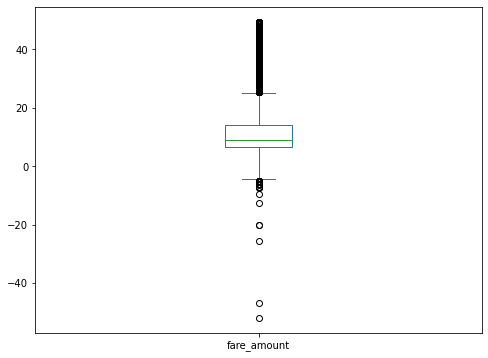

In [150]:
# drop ouliers from fare_amount 
df_fare_amount = clean_df[clean_df['fare_amount'] < 50]
df_fare_amount['fare_amount'].plot(kind="box", figsize=(8,6))
plt.show()

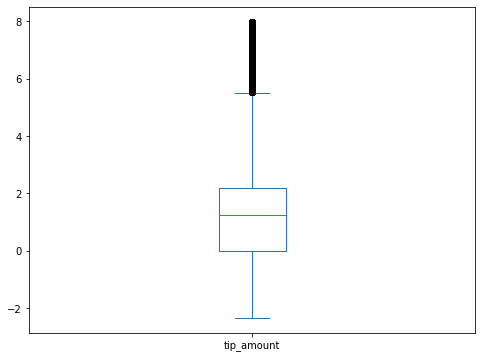

In [151]:
# drop ouliers from fare_amount 
df_tip_amount = clean_df[clean_df['tip_amount'] < 8]
df_tip_amount['tip_amount'].plot(kind="box", figsize=(8,6))
plt.show()

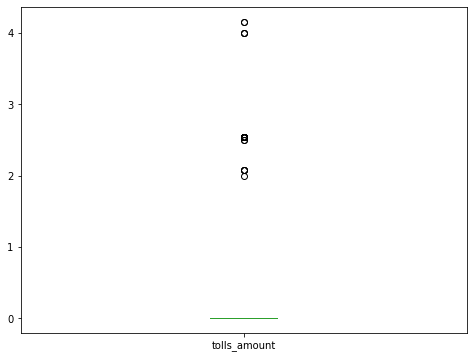

In [152]:
# drop ouliers from fare_amount 
df_tolls_amount =  clean_df[clean_df['tolls_amount'] < 5]

df_tolls_amount['tolls_amount'].plot(kind="box", figsize=(8,6))
plt.show()

In [153]:
clean_df[clean_df['RatecodeID'] < 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.92,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.10,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.10,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.00,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,2016-03-01 11:33:03,2016-03-01 11:54:03,1,2.18,-73.983498,40.734501,1,N,-73.976463,...,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76,21.00,11
199996,2,2016-03-01 11:33:04,2016-03-01 11:46:05,1,1.70,-73.991852,40.751495,1,N,-73.975075,...,1,10.0,0.0,0.5,2.70,0.00,0.3,13.50,13.02,11
199997,2,2016-03-01 11:33:04,2016-03-01 12:00:17,1,2.19,-73.969940,40.752838,1,N,-73.995819,...,1,16.5,0.0,0.5,3.46,0.00,0.3,20.76,27.22,11
199998,2,2016-03-01 11:33:04,2016-03-01 11:53:49,1,8.17,-73.955017,40.777412,1,N,-73.861343,...,2,25.0,0.0,0.5,0.00,0.00,0.3,25.80,20.75,11


In [154]:
# Create a function to remove outlier
def remove_outlier(data):
    df = data[data['tolls_amount'] < 5]
    
    df = df[df['tip_amount'] < 8]
    df = df[df['fare_amount'] < 50]
    df = df[df['RatecodeID'] < 6]
    df = df[df['total_amount'] > 0]
    
    return df

In [155]:
data_with_clean_location = clean_locations(clean_df)

In [156]:
data_with_clean_date = convert_datetime(data_with_clean_location)

In [157]:
#data_with_no_outlier = remove_outlier(data_with_clean_date
data_with_no_outlier = data_with_clean_date.copy()

### Feature selection/ Feature engineering

In [160]:
# create a function to drop few columns    
def drop_columns(data):
    drop_columns=['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag']#,'year','month']
    df =data.drop(drop_columns,axis=1)
    
    return df

In [161]:
df_train = drop_columns(data_with_no_outlier)

In [162]:
df_train

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour
0,1,2.50,-73.976746,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.92,0
1,1,2.90,-73.983482,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.10,0
2,2,19.98,-73.782021,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.10,0
3,3,10.78,-73.863419,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.00,0
4,5,30.43,-73.971741,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,2.18,-73.983498,40.734501,1,-73.976463,40.759010,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76,21.00,11
199996,1,1.70,-73.991852,40.751495,1,-73.975075,40.763672,1,10.0,0.0,0.5,2.70,0.00,0.3,13.50,13.02,11
199997,1,2.19,-73.969940,40.752838,1,-73.995819,40.769348,1,16.5,0.0,0.5,3.46,0.00,0.3,20.76,27.22,11
199998,1,8.17,-73.955017,40.777412,1,-73.861343,40.839046,2,25.0,0.0,0.5,0.00,0.00,0.3,25.80,20.75,11


In [163]:
from sklearn.model_selection import train_test_split

# Separate features and labeal
y = df_train['total_amount']
y

x = df_train.drop('total_amount', axis=1)
x

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_time,hour
0,1,2.50,-73.976746,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,7.92,0
1,1,2.90,-73.983482,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,11.10,0
2,2,19.98,-73.782021,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,31.10,0
3,3,10.78,-73.863419,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,0.00,0
4,5,30.43,-73.971741,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,2.18,-73.983498,40.734501,1,-73.976463,40.759010,1,14.0,0.0,0.5,2.96,0.00,0.3,21.00,11
199996,1,1.70,-73.991852,40.751495,1,-73.975075,40.763672,1,10.0,0.0,0.5,2.70,0.00,0.3,13.02,11
199997,1,2.19,-73.969940,40.752838,1,-73.995819,40.769348,1,16.5,0.0,0.5,3.46,0.00,0.3,27.22,11
199998,1,8.17,-73.955017,40.777412,1,-73.861343,40.839046,2,25.0,0.0,0.5,0.00,0.00,0.3,20.75,11


In [164]:
X_train ,X_test, y_train ,y_test= train_test_split(x,y, test_size=0.2, random_state=101)

### Feature Scaling

In [165]:
# # scale the data
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# scale_data = StandardScaler().fit_transform(X_train)

In [166]:
# clean_locations()
# convert_datetime()
# remove_outlier()
# drop_columns()
# StandardScaler()

In [167]:
print(f'X_train size:{X_train.shape}')
print(f'X_train size:{X_test.shape}')
print(f'X_train size:{y_train.shape}')
print(f'X_train size:{y_test.shape}')

X_train size:(158001, 16)
X_train size:(39501, 16)
X_train size:(158001,)
X_train size:(39501,)


# Explore many different models and shortlist the best ones.

In [168]:
# Linear regression
from sklearn.linear_model import LinearRegression

l_reg= LinearRegression()

In [169]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [170]:
# measure this regression model’s RMSE 
from sklearn.metrics import mean_squared_error

predict_data = l_reg.predict(X_test)
lg_mse = mean_squared_error(predict_data,y_test)
lg_rmes = np.sqrt(lg_mse)
#lg_rmes = round(lg_rmes,15)
print(f'The root mean squared error is:{lg_rmes}')

The root mean squared error is:0.00012913221849687569


In [171]:
print(predict_data[:10])
print(list(y_test[:10]))

[14.29998175 53.75993608  9.95999979 10.55999329  8.75996616 13.4998871
  9.80001028  8.79993867  7.79997079 36.29990806]
[14.3, 53.76, 9.96, 10.56, 8.76, 13.5, 9.8, 8.8, 7.8, 36.3]


In [210]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [175]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [176]:
predict_data = tree_reg.predict(X_test)
tree_reg_mse = mean_squared_error(predict_data, y_test)
tree_reg__rmes = np.sqrt(tree_reg_mse)
#lg_rmes = round(lg_rmes,15)
print(f'The root mean squared error is:{tree_reg__rmes}')

The root mean squared error is:2.8910970571512316


In [177]:
print(predict_data[:15])
print(list(y_test[:15]))

[14.3  53.76  9.96 10.56  8.76 13.5   9.8   8.8   7.8  36.3   9.3  12.3
  7.88  6.8  12.96]
[14.3, 53.76, 9.96, 10.56, 8.76, 13.5, 9.8, 8.8, 7.8, 36.3, 9.3, 12.3, 7.88, 6.8, 12.96]


In [178]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [179]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.69859859 0.7856002  0.78126131 5.29503958 1.26921382 1.04033644
 0.64316861 0.82551729 0.42693868 0.41007537]
Mean: 1.217574991049501
Standard deviation: 1.3808301568007402


In [180]:
lin_scores = cross_val_score(l_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [9.37483350e-05 2.69211930e-04 9.31967933e-05 1.52769445e-04
 1.00264439e-04 6.36760106e-03 1.20146901e-04 1.23789585e-04
 8.99993773e-03 9.57643904e-05]
Mean: 0.0016416430602013547
Standard deviation: 0.0030782718170695006


In [181]:
# Random forest Regression
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [182]:
forest_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.9236209008078884

In [183]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.3996128  0.79304205 0.54984215 5.26019023 0.53061514 0.5432378
 0.49691748 0.96950274 0.2630695  0.31926832]
Mean: 1.0125298220054866
Standard deviation: 1.4297911553963354


In [184]:
# Support Vector Machine regressor
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
svm_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.09300522849902375

# Fine-Tune the model and combine them into a great solution

### Fine-tune the hyperparameters using cross-validation

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
#    {'n_estimators': [3,10, 30], 'max_features': [2, 4, 6, 8]},
    {'n_estimators': [10, 30, 50], 'max_features': [6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [194]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, 10, 12],
                          'n_estimators': [10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [195]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 30}

In [196]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=30, random_state=42)

In [197]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.084011055168538 {'max_features': 6, 'n_estimators': 10}
2.009338916211412 {'max_features': 6, 'n_estimators': 30}
1.9811943826053666 {'max_features': 6, 'n_estimators': 50}
1.9604267587301045 {'max_features': 8, 'n_estimators': 10}
1.8970290506052199 {'max_features': 8, 'n_estimators': 30}
1.8903433868963664 {'max_features': 8, 'n_estimators': 50}
1.9091654808676304 {'max_features': 10, 'n_estimators': 10}
1.8661826845547602 {'max_features': 10, 'n_estimators': 30}
1.8530101482890537 {'max_features': 10, 'n_estimators': 50}
1.859684004233482 {'max_features': 12, 'n_estimators': 10}
1.8157089968154914 {'max_features': 12, 'n_estimators': 30}
1.8191214431707812 {'max_features': 12, 'n_estimators': 50}
2.6564355809229827 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.3783841524265155 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.3138507280552365 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.2206385617674984 {'bootstrap': False, 'max_features'

In [198]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.57732373e-05, 1.43941608e-01, 3.19674430e-04, 3.11369123e-04,
       9.57986830e-03, 8.76062260e-04, 1.57588885e-04, 1.36115825e-03,
       7.06132665e-01, 6.91173813e-05, 1.66437066e-04, 3.27561440e-02,
       6.99099595e-02, 1.64073565e-04, 3.37005428e-02, 5.37958428e-04])

In [199]:
attributes = X_train.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7061326649065784, 'fare_amount'),
 (0.1439416078284475, 'trip_distance'),
 (0.06990995951847645, 'tolls_amount'),
 (0.03370054283660408, 'trip_time'),
 (0.03275614397715087, 'tip_amount'),
 (0.009579868304224162, 'RatecodeID'),
 (0.0013611582523906027, 'payment_type'),
 (0.0008760622598184875, 'dropoff_longitude'),
 (0.0005379584281621225, 'hour'),
 (0.0003196744300803117, 'pickup_longitude'),
 (0.0003113691234033744, 'pickup_latitude'),
 (0.00016643706585261483, 'mta_tax'),
 (0.0001640735650349749, 'improvement_surcharge'),
 (0.00015758888524618314, 'dropoff_latitude'),
 (6.911738126644787e-05, 'extra'),
 (1.577323726347525e-05, 'passenger_count')]

With grid search RandomForest Regressor is giving good value, so we are going to use it as final model.

In [204]:
# Let's save the final model
my_model = grid_search.best_estimator_

import joblib
joblib.dump(my_model, "my_model.pkl") 

# Present the solution

In [206]:
my_model_loaded = joblib.load("my_model.pkl") 

In [207]:
final_model = my_model_loaded
#final_model = grid_search.best_estimator_

test = pd.read_csv('test.csv')

test = clean_locations(test)
test = convert_datetime(test)
#remove_outlier()
test = drop_columns(test)

X_test = test.drop('total_amount', axis=1) 
y_test = test['total_amount']
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [208]:
final_rmse

0.7446509112080982

In [209]:
print(f"Prediction:{final_predictions[:10]}")
print(f"Labels:{list(y_test[:10])}")

Prediction:[ 4.7         9.03633333 13.21666667  9.58333333 36.90333333 10.81833333
 40.55666667  6.222      11.694      17.66333333]
Labels:[4.8, 9.3, 13.3, 9.8, 36.99, 11.0, 40.55, 6.35, 11.76, 17.76]
